In [25]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

# Step 1: Read the file into a pandas DataFrame
file_path = r'C:\Users\pedam\Documents\src_data\goodreads_data.json'  # Replace with the actual path to your file
df_goodreads_data = pd.read_json(file_path)

# Set the environment variable OMP_NUM_THREADS to 1
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress UserWarning related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning)

print(tabulate(df_goodreads_data.head(), headers='keys', tablefmt='psql'))


+----+------------------------------------------------------------------+-------------------+------------+-----------------+----------------+----------------+----------------+---------------+-----------------------------------+
|    | Title                                                            |   Number of Pages | Language   | Author          |   Rating Value |   Rating Count |   Review Count |          ISBN | Publication Date                  |
|----+------------------------------------------------------------------+-------------------+------------+-----------------+----------------+----------------+----------------+---------------+-----------------------------------|
|  0 | Lottery Master Guide: Turn a Game of Chance Into a Game of Skill |               192 | English    | Gail Howard     |           3.98 |             46 |              4 | 9780945760382 | First published April 1, 1997     |
|  1 | Winning Lotto / Lottery For Everyday Players                     |               

In [26]:
print(f"The dataset contains {df_goodreads_data.shape[0]} books and {df_goodreads_data.shape[1]} data columns")
print(f"The columns in the dataset are: \n{list(df_goodreads_data.columns)}")
df_goodreads_data.drop(['ISBN'],axis=1,inplace=True)
df_goodreads_data.rename(columns = {'Title':'title', 'Author':'author', 'Number of Pages':'num_pages', 'Language': 'lang',
                     'Rating Value': 'avg_rating', 'Rating Count': 'num_ratings', 'Review Count': 'num_reviews', 
                     'Publication Date':'pub_date_string'}, inplace=True)

The dataset contains 134394 books and 9 data columns
The columns in the dataset are: 
['Title', 'Number of Pages', 'Language', 'Author', 'Rating Value', 'Rating Count', 'Review Count', 'ISBN', 'Publication Date']


In [27]:
print(tabulate(df_goodreads_data.head(), headers='keys', tablefmt='psql'))

+----+------------------------------------------------------------------+-------------+---------+-----------------+--------------+---------------+---------------+-----------------------------------+
|    | title                                                            |   num_pages | lang    | author          |   avg_rating |   num_ratings |   num_reviews | pub_date_string                   |
|----+------------------------------------------------------------------+-------------+---------+-----------------+--------------+---------------+---------------+-----------------------------------|
|  0 | Lottery Master Guide: Turn a Game of Chance Into a Game of Skill |         192 | English | Gail Howard     |         3.98 |            46 |             4 | First published April 1, 1997     |
|  1 | Winning Lotto / Lottery For Everyday Players                     |         160 | English | Professor Jones |         2.5  |             6 |             1 | First published November 1, 1993  |
|  2 

In [28]:
#Next we check the rows and see if there are any duplicates.

duplicate_rows = df_goodreads_data[df_goodreads_data.duplicated(['title', 'author'])]
print(f"There are {len(duplicate_rows)} entires that are duplicates.")

There are 8825 entires that are duplicates.


In [29]:
duplicate_rows[:10]

,title,num_pages,lang,author,avg_rating,num_ratings,num_reviews,pub_date_string
17,The Glass Menagerie,116,English,Tennessee Williams,3.73,132332,3555,"First published January 1, 1945"
21,The Glass Menagerie,90,English,Tennessee Williams,3.73,132332,3555,"First published January 1, 1945"
160,The Fellowship of the Ring (The Lord of the Ri...,458,English,J.R.R. Tolkien,4.39,2778429,38098,"First published July 29, 1954"
174,A Separate Reality: Further Conversations with...,318,English,Carlos Castaneda,4.08,18404,351,"First published January 1, 1971"
176,The Razor&apos;s Edge,N/A,English,W. Somerset Maugham,4.19,47621,4090,"First published January 1, 1944"
178,The Razor&apos;s Edge,0,English,W. Somerset Maugham,4.19,47621,4090,"First published January 1, 1944"
185,Italian Hours,310,English,Henry James,3.62,341,37,"First published January 1, 1909"
245,"The Riddle-Master of Hed (Riddle-Master, #1)",229,English,Patricia A. McKillip,3.99,12507,626,"First published January 1, 1976"
247,Fool&apos;s Run,0,English,Patricia A. McKillip,3.66,662,57,"First published January 1, 1987"
249,"Harpist in the Wind (Riddle-Master, #3)",261,English,Patricia A. McKillip,4.18,7546,258,"First published January 1, 1979"


In [30]:
print(f"Before removing duplicate entries there are {df_goodreads_data.shape[0]} books.")
df_goodreads_data.drop_duplicates(subset=['title', 'author'],inplace=True)
print(f"After removing duplicate entries there are {df_goodreads_data.shape[0]} books.")

Before removing duplicate entries there are 134394 books.
After removing duplicate entries there are 125569 books.


In [31]:
df_goodreads_data.describe()

,title,num_pages,lang,author,avg_rating,num_ratings,num_reviews,pub_date_string
count,125569,125569,125569,125569,125569,125569,125569,125569
unique,123245,1605,74,59533,289,15891,4505,10674
top,Selected Poems,0,English,William Shakespeare,N/A,N/A,N/A,"First published January 1, 2006"
freq,34,5230,110123,292,12368,12368,32349,2583


In [32]:
df_goodreads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125569 entries, 0 to 134393
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            125569 non-null  object
 1   num_pages        125569 non-null  object
 2   lang             125569 non-null  object
 3   author           125569 non-null  object
 4   avg_rating       125569 non-null  object
 5   num_ratings      125569 non-null  object
 6   num_reviews      125569 non-null  object
 7   pub_date_string  125569 non-null  object
dtypes: object(8)
memory usage: 8.6+ MB


In [33]:
print(df_goodreads_data.num_pages.value_counts())

n0 = df_goodreads_data.num_pages.value_counts()[0]
n_NA = df_goodreads_data.num_pages.value_counts()['N/A']
percent0 = (n0/df_goodreads_data.shape[0])*100
percent_NA = (n_NA/df_goodreads_data.shape[0])*100

print(f"\nThere are {n_NA} books with 'N/A' in number of pages ({percent_NA:.1f}% of the total sample).")
print(f"There are also {n0} books which supposedly have 0 pages ({percent0:.1f}% of the total sample). This can't be physical. ")
print("As these are relatively small percentages, we decide to drop these books from the dataset.")

num_pages
0       5230
N/A     5130
256     2798
192     2578
224     2487
        ... 
1940       1
1001       1
3840       1
3020       1
1347       1
Name: count, Length: 1605, dtype: int64

There are 5130 books with 'N/A' in number of pages (4.1% of the total sample).
There are also 5230 books which supposedly have 0 pages (4.2% of the total sample). This can't be physical. 
As these are relatively small percentages, we decide to drop these books from the dataset.


In [34]:
df_goodreads_data = df_goodreads_data[df_goodreads_data['num_pages']!='N/A']
df_goodreads_data = df_goodreads_data[df_goodreads_data['num_pages']>0]
print(f"The dataset now contains {df_goodreads_data.shape[0]} books and {df_goodreads_data.shape[1]} data columns")

The dataset now contains 115209 books and 8 data columns


In [35]:
rating_value_counts = df_goodreads_data.avg_rating.value_counts()
print(rating_value_counts)

n_NA = df_goodreads_data.avg_rating.value_counts()['N/A']
percent_NA = (n_NA/df_goodreads_data.shape[0])*100

print(f"\nThere are {n_NA} books with 'N/A' in number of ratings ({percent_NA:.1f}% of the total sample).")
print(f"Are there are books with 0 in num_ratings: {0 in rating_value_counts}")

avg_rating
N/A     10879
4        5935
3        2790
5        2695
3.5      1757
        ...  
2.06        1
1.83        1
2.18        1
1.6         1
1.2         1
Name: count, Length: 287, dtype: int64

There are 10879 books with 'N/A' in number of ratings (9.4% of the total sample).
Are there are books with 0 in num_ratings: False


In [36]:
df_goodreads_data=df_goodreads_data[df_goodreads_data.avg_rating != 'N/A']
print(f"There are now {df_goodreads_data.shape[0]} entires")

There are now 104330 entires


In [37]:
df_goodreads_data['num_reviews'] = df_goodreads_data['num_reviews'].replace('N/A', 0).astype(int)

In [38]:
df_goodreads_data.num_pages = df_goodreads_data.num_pages.astype(int)
df_goodreads_data.avg_rating = df_goodreads_data.avg_rating.astype(float)
df_goodreads_data.num_ratings = df_goodreads_data.num_ratings.astype(int)

In [39]:
#Strip off the text at the start of the date
df_goodreads_data['pub_date'] = df_goodreads_data['pub_date_string'].str.split('ublished').str[-1]

#due to ambiguity, books published in 2-digit years, e.g. 50AD, are mistakenly converted to dates in the 2000s
# We need to remove these first. 
df_goodreads_data['year_str'] = df_goodreads_data['pub_date'].str.split(', ').str[-1]
df_goodreads_data=df_goodreads_data[df_goodreads_data.year_str.apply(lambda x: len(x)>2)]
df_goodreads_data.drop(['year_str'],axis=1,inplace=True)

# The we convert the remaining dates into datetime objects 
df_goodreads_data["pub_date"]=pd.to_datetime(df_goodreads_data["pub_date"], errors = 'coerce')
df_goodreads_data = df_goodreads_data[df_goodreads_data.pub_date.notnull()]
print(f"The dataset now has {df_goodreads_data.shape[0]} books.")

The dataset now has 102946 books.


In [40]:
# We also create new columns for the day, month and years as integers
df_goodreads_data['year'] = df_goodreads_data.pub_date.dt.year.astype(int)
df_goodreads_data['month'] = df_goodreads_data.pub_date.dt.month.astype(int)
df_goodreads_data['day'] = df_goodreads_data.pub_date.dt.day.astype(int)

In [41]:
df_goodreads_data.to_csv(r'C:\Users\pedam\Documents\src_data\goodreads_data_clean.csv',index=False)

In [42]:
sns.heatmap(df_goodreads_data.corr(),annot=True)

ValueError: could not convert string to float: 'Lottery Master Guide: Turn a Game of Chance Into a Game of Skill'

In [44]:
print("The most common publication months are:")
print(df_goodreads_data.month.value_counts()[:5])
print("\nThe most common publication days are:")
print(df_goodreads_data.day.value_counts()[:5])

The most common publication months are:
month
1     52820
10     6247
9      6037
6      4645
4      4579
Name: count, dtype: int64

The most common publication days are:
day
1     75034
15     2309
30     1872
28     1679
31     1241
Name: count, dtype: int64


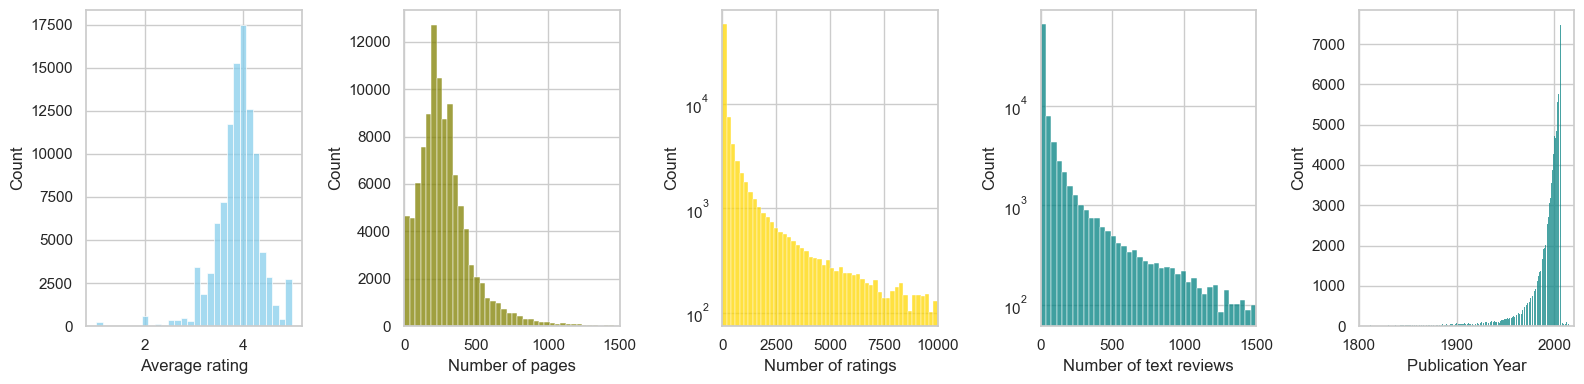

In [46]:
sns.set(style="whitegrid") 
fig,axs = plt.subplots(1,5, figsize = (16,4))
sns.histplot(data=df_goodreads_data['avg_rating'], color="skyblue", bins=30,ax=axs[0])
axs[0].set_xlabel("Average rating")

sns.histplot(data=df_goodreads_data['num_pages'], color="olive", binrange=(0,1500),bins=40,ax=axs[1])
axs[1].set_xlim(0,1500)
axs[1].set_xlabel('Number of pages')

sns.histplot(data=df_goodreads_data['num_ratings'], color="gold", binrange=(0,10000),bins=50,ax=axs[2])
axs[2].set_xlim(0,10000)
axs[2].set_xlabel("Number of ratings")
axs[2].set_yscale("log")

sns.histplot(data=df_goodreads_data['num_reviews'], color="teal", binrange=(0,1500),bins=40,ax=axs[3])
axs[3].set_xlim(0,1500)
axs[3].set_xlabel("Number of text reviews")
axs[3].set_yscale("log")

sns.histplot(data=df_goodreads_data.year, color="teal",ax=axs[4])
axs[4].set_xlabel("Publication Year")
axs[4].set_xlim(1800,2020)

fig.tight_layout()

In [47]:
top_rated = df_goodreads_data.sort_values(by='avg_rating',ascending=False).head(10)
# or: top_rated = df.nlargest(columns="average_rating", n=10)
top_rated[:5]

,title,num_pages,lang,author,avg_rating,num_ratings,num_reviews,pub_date_string,pub_date,year,month,day
90885,Tribe Of The Tiger,260,English,Joe Dacy II,5.0,2,1,"First published January 1, 1997",1997-01-01,1997,1,1
70334,Rainbowfishes : In Nature and In the Aquarium,182,English,Gerald Allen,5.0,1,0,"First published April 1, 1995",1995-04-01,1995,4,1
92777,Salinas Valley (Images of America: California),128,English,Margaret E. Clovis,5.0,2,0,"First published October 31, 2005",2005-10-31,2005,10,31
14963,Hafiz: Tongue of the Hidden: Poems from the Divan,92,English,Hafez,5.0,2,0,"Published January 1, 1990",1990-01-01,1990,1,1
14962,"Hafiz, Master of Persian Poetry: A Critical Bi...",400,English,Parvin Loloi,5.0,1,0,"First published March 4, 2004",2004-03-04,2004,3,4


In [48]:
df_ratings100 = df_goodreads_data[df_goodreads_data.num_ratings > 100]
top_rated = df_ratings100.sort_values(by='avg_rating',ascending=False).head(15)
#top_rated[:5]

Text(0, 0.5, '')

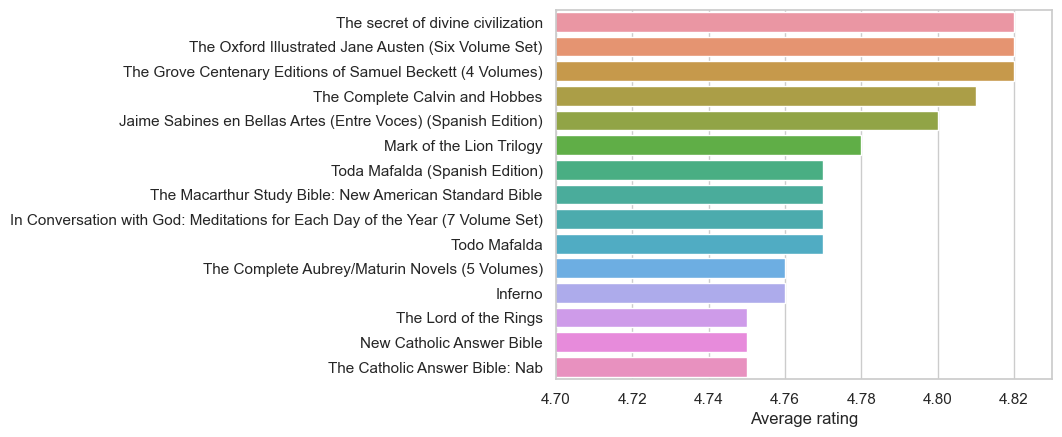

In [49]:
sns.barplot(data=top_rated,x='avg_rating',y='title')
plt.xlim(4.7,4.83)
plt.xlabel("Average rating")
plt.ylabel("")

In [50]:
prolific_authors = df_goodreads_data.value_counts("author").head(15)

Text(0.5, 0, 'Number of books')

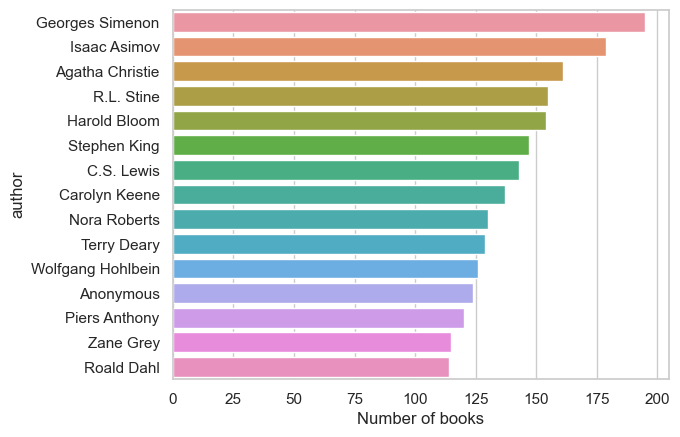

In [51]:
sns.barplot(y=prolific_authors.index, x=prolific_authors)
plt.xlabel("Number of books")

In [52]:
df_copy = df_goodreads_data.copy()
df_simenon = df_copy[df_copy.author == "Georges Simenon"]
#df_simenon['decade'] = (df_simenon.year//10)*10

#calculate mean rating over periods of 5 years
df_simenon_rating_year = df_simenon.groupby((df_simenon['year']//5)*5)['avg_rating'].agg(['mean'])

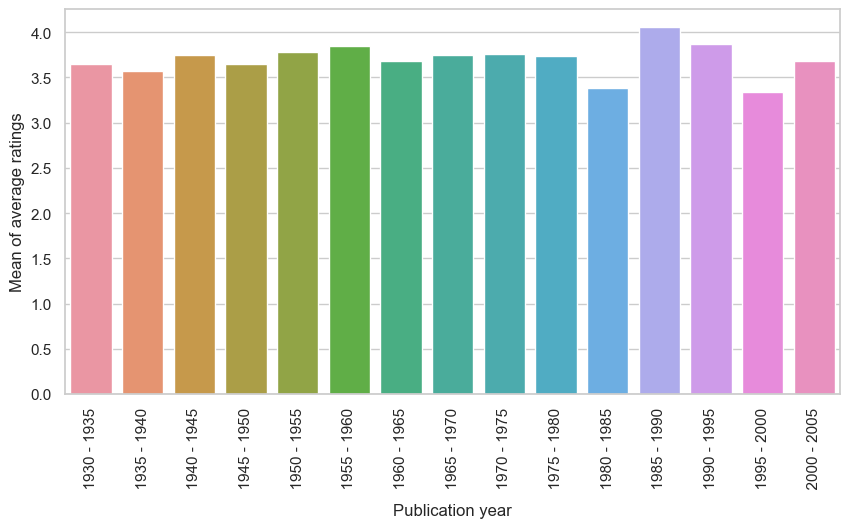

In [53]:
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data=df_simenon_rating_year,x=df_simenon_rating_year.index, y="mean",ax=ax)
plt.ylabel("Mean of average ratings")
plt.xlabel("Publication year")
plt.xticks(rotation=90)
years = list(df_simenon_rating_year.index)
labels = [f"  {start} - {end}" for start, end in zip(years, years[1:] + [2005])]
ax.set_xticklabels(labels);

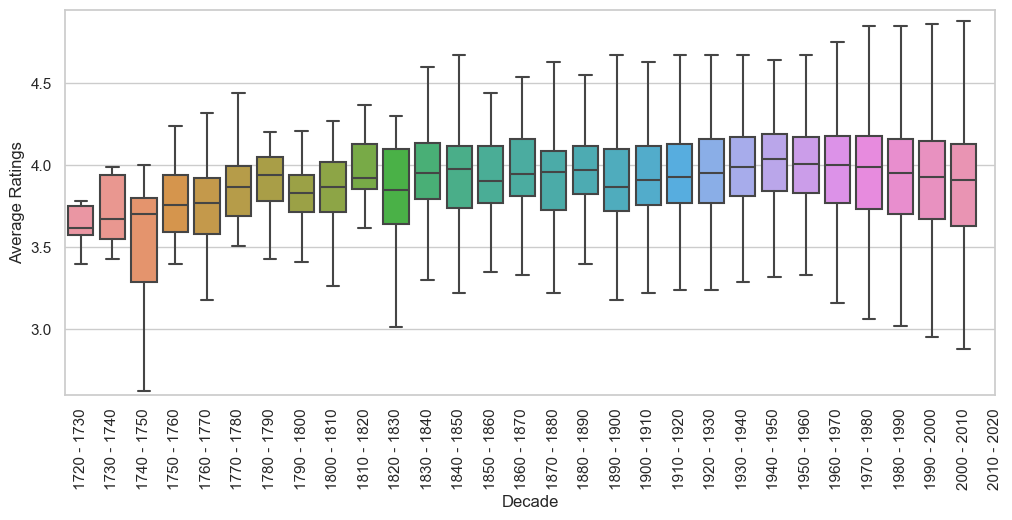

In [54]:
df_box = df_goodreads_data[df_goodreads_data.year>1720]
df_box = df_box[df_box.year<2010]
bins = range(1720, max(df_box['year'])+10,10)
df_box['year_bins'] = pd.cut(df_box['year'], bins=bins)

plt.figure(figsize=(12, 5))
sns.boxplot(x='year_bins', y='avg_rating', data=df_box, showfliers=False)

# Create a list of custom labels
custom_labels = [f"{int(start)} - {int(start) + 10}" for start in bins]
plt.xticks(range(len(custom_labels)), custom_labels, rotation=90)

plt.xlabel('Decade')
plt.ylabel('Average Ratings')
plt.ylim(2.6,4.95);